# Regresion con Multiperceptrón de Scikit-Learn
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


### Carga del Dataset y selección de atributos numéricos

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

nombre_archivo = DATOS_DIR + 'energy_efficiency_data.csv'


df= pd.read_csv(nombre_archivo)

### Verificación de tipos de datos y valores nulos

In [3]:
# muestra tipo de datos de los atributos, cantidad de filas y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


### Muestra las primeras filas de los Datos

In [4]:
df.head(10)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


### Matriz de Correlación con Seaborn

<Axes: >

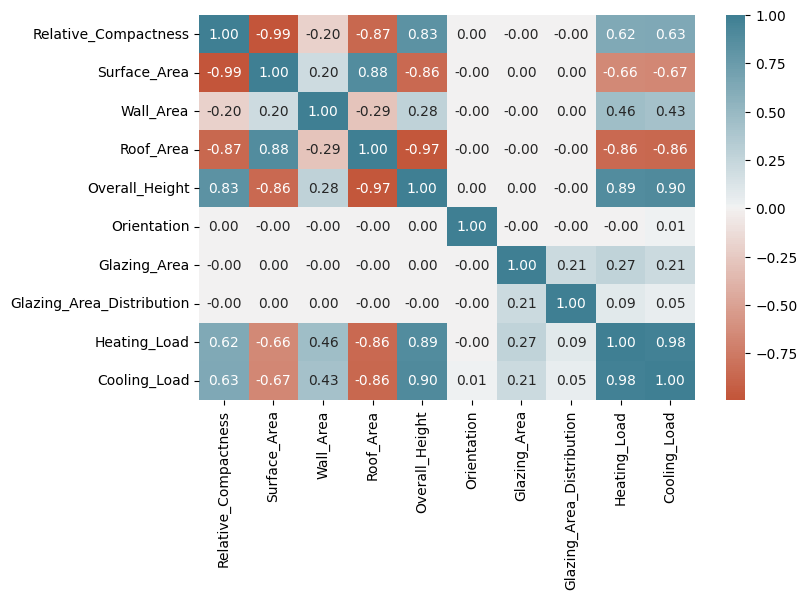

In [5]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(),annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')

### Selección de atributos. Separación en entrenamiento y prueba. Normalización de valores

In [6]:
# elimina atributos redundantes
X = np.array(df.drop(['Heating_Load','Cooling_Load', 'Relative_Compactness', 'Overall_Height'],axis=1))

# Y= df[['Heating Load']]
Y= np.array(df['Cooling_Load'])

# Separa datos en grupo de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state = 20)

data_scaler = StandardScaler()
# data_scaler = MinMaxScaler()

X_train = data_scaler.fit_transform(X_train)
X_test = data_scaler.transform(X_test)

### Construccion del Modelo

In [7]:
MAX_ITER = 10000
COTA = 0.001
ALFA = 0.001
# cantidad de datos a procesar para actualizar pesos
TAM_LOTE = 50

ACTIVACION = 'relu'
#ACTIVACION = 'tanh'
#ACTIVATION = 'identity'

#OPTIMIZADOR = 'lbfgs'
OPTIMIZADOR = 'sgd'
#OPTIMIZADOR = 'adam'

mlpr = MLPRegressor(
    hidden_layer_sizes=[30, 15],  # Arquitectura con tres capas ocultas
    activation=ACTIVACION,  # Función de activación de capas ocultas.
    solver=OPTIMIZADOR,     # Algoritmo de optimización
    max_iter=MAX_ITER,      # Número máximo de iteraciones
    alpha=ALFA,             # Tasa de aprendizaje.
    random_state=None,      # Semilla para la generación de números aleatorios para reproducibilidad.
    batch_size=TAM_LOTE,    # Tamaño del lote de datos utilizado para la actualización de pesos.
    tol=COTA,               # Tolerancia para la convergencia de parada temprana
    verbose=True            # Imprimir información durante el entrenamiento.
)

mlpr.fit(X_train, Y_train)

print('Iteraciones realizadas: %d' % mlpr.n_iter_)

Iteration 1, loss = 287.27733093
Iteration 2, loss = 37.11693253
Iteration 3, loss = 13.64459323
Iteration 4, loss = 10.77999062
Iteration 5, loss = 9.87638941
Iteration 6, loss = 9.24792722
Iteration 7, loss = 8.79346669
Iteration 8, loss = 8.98551692
Iteration 9, loss = 8.58520094
Iteration 10, loss = 8.47249240
Iteration 11, loss = 8.03441336
Iteration 12, loss = 7.79441917
Iteration 13, loss = 7.40036323
Iteration 14, loss = 7.01185535
Iteration 15, loss = 6.56932887
Iteration 16, loss = 6.19555813
Iteration 17, loss = 5.80571854
Iteration 18, loss = 5.54170637
Iteration 19, loss = 5.26337288
Iteration 20, loss = 4.77311505
Iteration 21, loss = 4.63682417
Iteration 22, loss = 4.32757859
Iteration 23, loss = 4.07031029
Iteration 24, loss = 3.83510419
Iteration 25, loss = 3.77261120
Iteration 26, loss = 3.61640917
Iteration 27, loss = 3.48432235
Iteration 28, loss = 3.37227286
Iteration 29, loss = 3.38284593
Iteration 30, loss = 3.37125871
Iteration 31, loss = 3.26159203
Iteration 32

In [11]:
mlpr.out_activation_ = 'identity'

### Metricas sobre el modelo

In [8]:
# Realizar predicciones
Y_pred = mlpr.predict(X_test)

# Calcular métricas de evaluación usando las predicciones (Y_pred) y los valores reales (Y_test)
mae = mean_absolute_error(Y_test, Y_pred)  # Calcular el error absoluto medio
mse = mean_squared_error(Y_test, Y_pred)   # Calcular el error cuadrático medio
rmse = np.sqrt(mse)                        # Calcular la raíz del error cuadrático medio
r2 = r2_score(Y_test, Y_pred)              # Calcular el coeficiente de determinación

print(f"    Mean Absolute Error: {mae}")
print(f"     Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"     R-squared r2_score: {r2}")

# tambien puede calcularse R^2 con el MLPRegressor
print(f" R-squared MLPRegressor:", mlpr.score(X_test, Y_test))
# R2 (R cuadrado) es la proporción de varianza en la variable dependiente que es predecible a
# partir de las independientes en un modelo de regresión. R2=1 significa que el modelo explica el
# 100% de la variabilidad en los datos

    Mean Absolute Error: 0.8251613140379517
     Mean Squared Error: 1.3521798343974647
Root Mean Squared Error: 1.1628326768703503
     R-squared r2_score: 0.9850478302330404
 R-squared MLPRegressor: 0.9850478302330404


### Gráfico con evolución de curva de perdida

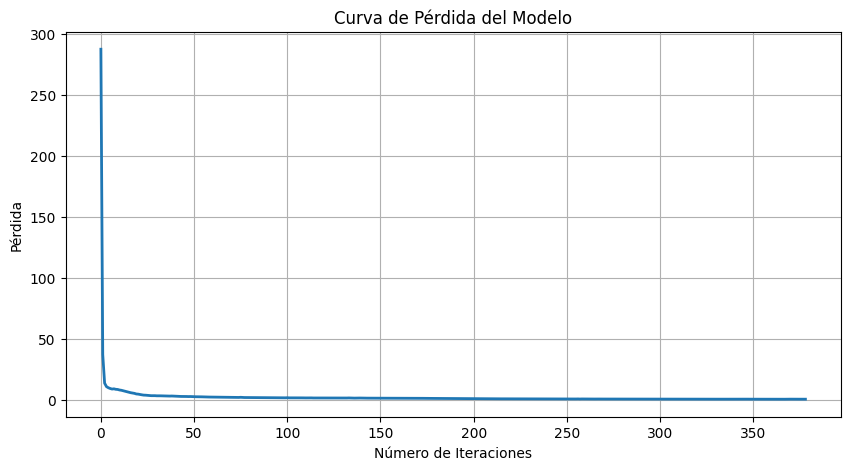

In [9]:
loss_curve = mlpr.loss_curve_  # curva de pérdida del modelo

# Dibuja curva de pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss_curve, linewidth=2)
plt.title('Curva de Pérdida del Modelo')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()